CNN using Tensorflow Keras

Import libraries

In [18]:
import tensorflow as tf

Define to the path to the dataset

In [19]:
train_dir = 'data_mv/train'
test_dir = 'data_mv/test'


Data Preprocessing(split data to train, test, val)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255)

image_size = (128, 128)
batch_size = 8

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'rgb',
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'rgb',
)



x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



Found 48 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
(8, 128, 128, 3)
(8, 3)
(8, 128, 128, 3)
(8, 3)


Build the CNN model

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    Flatten(),
    Dense(500, activation='relu'),
    Dense(250, activation='relu'),
    Dense(3,activation='softmax')
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 256)       295168    
                                                                 
 flatten_3 (Flatten)         (None, 200704)           

Model compile

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model fit to train model

In [23]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10


1/1 [==============================] - 5s 5s/step - loss: 1.1168 - accuracy: 0.3333 - val_loss: 5.4630 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 3.3585 - accuracy: 0.5000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 5.4129 - accuracy: 0.3333 - val_loss: 1.5984 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 1.3537 - accuracy: 0.1667 - val_loss: 1.1839 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.9342 - accuracy: 0.6667 - val_loss: 0.6963 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.8093 - accuracy: 0.8333 - val_loss: 2.7862 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.8179 - accuracy: 0.5000 - val_loss: 0.6045 - val_accuracy: 1.0000
Epoch 8/10
1/1 [====================

Evaluation

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

1/1 [==============================] - 0s 113ms/step - loss: 1.9794 - accuracy: 0.2500
1.9793915748596191
0.25


Visualization


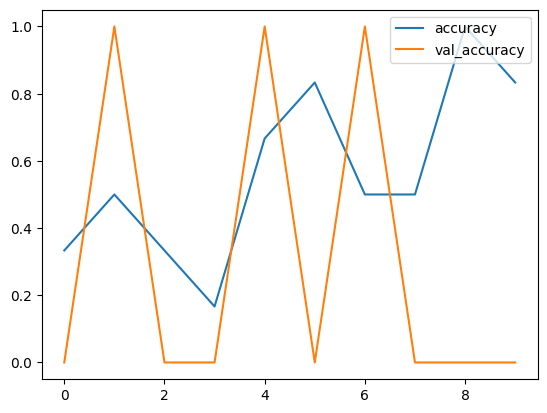

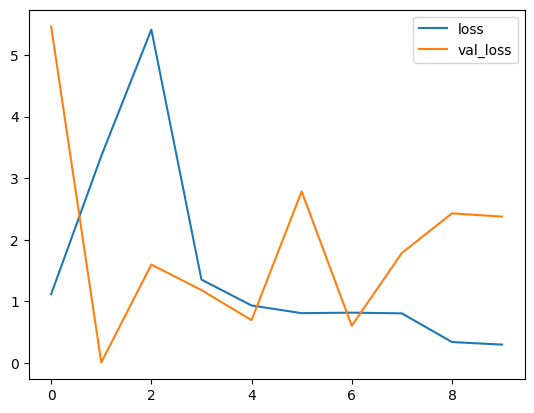

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
